In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline

In [5]:
np.random.seed(0)
X=np.linspace(0,10,15)+np.random.randn(15)/5
y=np.sin(X)+X/6+np.random.randn(15)/10
X_train,X_test,y_train,y_test=train_test_split(X,y)

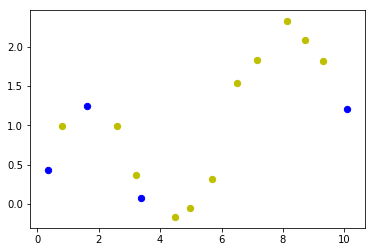

In [6]:
plt.scatter(X_train,y_train,marker='o',s=40,c='y')
plt.scatter(X_test,y_test,marker='o',s=40,c='b')


#### Q1

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [8]:
X_train=X_train.reshape((-1,1))

In [9]:
poly3=PolynomialFeatures(degree=3)
X_train_3=poly3.fit_transform(X_train)
poly6=PolynomialFeatures(degree=6)
X_train_6=poly6.fit_transform(X_train)
poly9=PolynomialFeatures(degree=9)
X_train_9=poly9.fit_transform(X_train)

In [10]:
linreg1=LinearRegression().fit(X_train,y_train)

In [11]:
linreg3=LinearRegression().fit(X_train_3,y_train)
linreg6=LinearRegression().fit(X_train_6,y_train)
linreg9=LinearRegression().fit(X_train_9,y_train)

In [12]:
out=np.zeros((4,100))
x1=np.linspace(0,10,100).reshape(-1,1)
x_list=[x1]
preproc=[poly3,poly6,poly9]
for i in preproc:
    a=i.transform(x1)
    x_list.append(a)
models=[linreg1,linreg3,linreg6,linreg9]
for i in range(0,4):
    out[i,:]=models[i].predict(x_list[i])

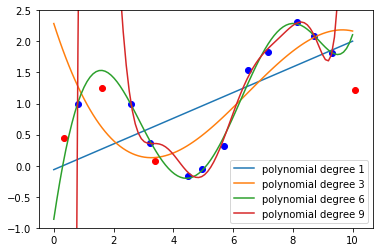

In [13]:
power=[1,3,6,9]
for i in range(0,4):
    plt.plot(x1,out[i,:],label='polynomial degree {}'.format(power[i]))
ax=plt.gca()
ax.set_ylim(-1,2.5)
plt.scatter(X_train,y_train,c='b')
plt.scatter(X_test,y_test,c='r')
plt.legend()

#### Q2 

In [14]:
X_train=X_train.reshape((-1,1))
X_test=X_test.reshape((-1,1))
score=[]
for i in range(1,10):
    preproc=PolynomialFeatures(degree=i)
    X_train_poly=preproc.fit_transform(X_train)
    X_test_poly=preproc.transform(X_test)
    model=LinearRegression().fit(X_train_poly,y_train)
    score.append((model.score(X_train_poly,y_train),model.score(X_test_poly,y_test)))
    
    

In [15]:

score

[(0.39972515623134719, -1.0744625064796236),
 (0.66148588109177464, -3.5146339351962181),
 (0.73679944299258149, -2.115561697046902),
 (0.95378771179051058, -2.8360673896378357),
 (0.98724962627120383, -0.75379837951044304),
 (0.98916035712152062, -0.28038154427089057),
 (0.98916692681445495, 0.033009461189431377),
 (0.98970899799159995, -18.866658652577957),
 (0.99394738557118467, -4566.7019621967384)]

#### Q4

In [16]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

In [17]:
poly12=PolynomialFeatures(degree=12)
X_train_12=poly12.fit_transform(X_train)
X_test_12=poly12.transform(X_test)

In [23]:
linreg=LinearRegression().fit(X_train_12,y_train)
linpred=linreg.predict(X_test_12)
linscore=r2_score(y_test,linpred)
lassoreg=Lasso(alpha=0.01,max_iter=100000).fit(X_train_12,y_train)
lassopred=lassoreg.predict(X_test_12)
lassoscore=r2_score(y_test,lassopred)

C:\Users\miluo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [24]:
linscore,lassoscore

(-87361.684939406754, -19.208425646060828)

In [25]:
lassopred

array([ 0.31857528,  1.07496401,  5.68645672,  1.07653871])

In [26]:
X_test

array([[  3.375973  ],
       [  0.35281047],
       [ 10.08877265],
       [  1.62431903]])

In [27]:
linpred

array([  1.54190799e-01,   1.31251909e+01,   2.98717308e+02,
        -2.76579414e+00])

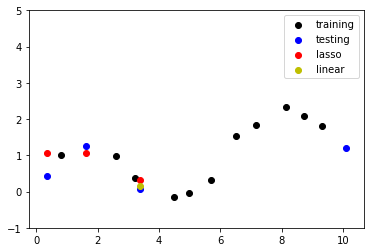

In [28]:
plt.scatter(X_train,y_train,c='k',label='training')
plt.scatter(X_test,y_test,c='b',label='testing')
plt.scatter(X_test,lassopred,c='r',label='lasso')
plt.scatter(X_test,linpred,c='y',label='linear')
plt.ylim(-1,5)
plt.legend()

####  Q5-8

In [29]:
%ls

 Volume in drive C is TI10668700I
 Volume Serial Number is 2CE7-31D0

 Directory of C:\Users\miluo\Python Data Science\Course 3

08/02/2017  08:49 PM    <DIR>          .
08/02/2017  08:49 PM    <DIR>          ..
08/02/2017  08:49 PM    <DIR>          .ipynb_checkpoints
08/02/2017  08:37 PM           373,704 agaricus-lepiota.data
08/02/2017  08:37 PM             6,816 agaricus-lepiota.names
08/01/2017  10:22 AM            83,507 Assignment_1.ipynb
08/02/2017  08:49 PM            75,406 Assignment_2.ipynb
08/02/2017  08:44 PM           119,983 Assignment2_LMi.ipynb
08/01/2017  07:50 AM           183,381 C3W1.ipynb
08/02/2017  07:20 PM            57,064 C3W2.ipynb
07/31/2017  09:03 PM             2,310 fruit_data_with_colors.txt
               8 File(s)        902,171 bytes
               3 Dir(s)  594,331,697,152 bytes free


In [31]:
mushroom=pd.read_csv('agaricus-lepiota.data',header=None)

In [32]:
mushroom.shape

(8124, 23)

In [33]:
mushroom=pd.get_dummies(df)

In [34]:
X=mushroom.iloc[:,2:]
y=mushroom.iloc[:,1]

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier().fit(X_train,y_train)

In [46]:
X_train.columns[np.argsort(clf.feature_importances_)[-5:][::-1]]

Index(['5_n', '11_c', '13_y', '20_r', '5_l'], dtype='object')

In [41]:
np.argsort(np.array([1,2,3,4]))

array([0, 1, 2, 3], dtype=int64)

In [47]:
from sklearn.model_selection import validation_curve

In [48]:
?validation_curve

In [49]:
gamma_range=np.logspace(-4,1,6)

In [52]:
from sklearn.svm import SVC

In [53]:
train_score,test_score=validation_curve(SVC(),X_train,y_train,param_name='gamma',param_range=gamma_range,scoring='accuracy')

In [54]:
train_score

array([[ 0.89091357,  0.89069424,  0.89785873],
       [ 0.96995814,  0.97218119,  0.978095  ],
       [ 0.99876878,  0.9985229 ,  0.99655427],
       [ 1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        ]])

In [55]:
test_score

array([[ 0.8976378 ,  0.89709503,  0.88423645],
       [ 0.96948819,  0.96651896,  0.97881773],
       [ 0.99852362,  0.99803053,  0.99655172],
       [ 1.        ,  1.        ,  1.        ],
       [ 1.        ,  0.99901526,  1.        ],
       [ 0.51968504,  0.51944855,  0.51970443]])

In [60]:
train_p=np.apply_along_axis(np.mean,axis=1,arr=train_score)

In [61]:
train_p

array([ 0.89315551,  0.97341144,  0.99794865,  1.        ,  1.        ,  1.        ])

In [62]:
test_p=np.apply_along_axis(np.mean,axis=1,arr=test_score)

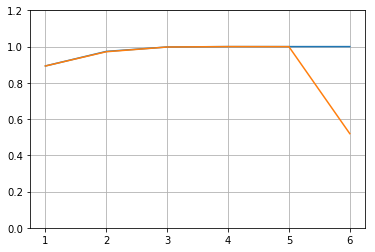

In [67]:
plt.plot(range(1,7),train_p)
plt.plot(range(1,7),test_p)
plt.ylim(0,1.2)
plt.grid()